In [9]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


## Load Dataset 

In [140]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df2

titanic_dataset=pd.concat([df1,df2],ignore_index=True,sort=True)
titanic_dataset.dropna(inplace=True)

titanic_dataset.fillna(method='ffill')
titanic_dataset.isnull().any()

Age            False
Cabin          False
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
dtype: bool

## Data Visualization

In [120]:
'''
titanic_dataset.columns
sbs.countplot(x="Survived",hue="Sex",data=titanic_dataset)
sbs.countplot(x="Survived",hue="Pclass",data=titanic_dataset)
titanic_dataset['Age'].plot.hist()
'''


'\ntitanic_dataset.columns\nsbs.countplot(x="Survived",hue="Sex",data=titanic_dataset)\nsbs.countplot(x="Survived",hue="Pclass",data=titanic_dataset)\ntitanic_dataset[\'Age\'].plot.hist()\n'

## Data Cleaning

In [142]:

sex=pd.get_dummies(titanic_dataset["Sex"],drop_first=True)
embarked=pd.get_dummies(titanic_dataset["Embarked"],drop_first=True)
pc1=pd.get_dummies(titanic_dataset["Pclass"],drop_first=True)
titanic_dataset=pd.concat([titanic_dataset,sex,embarked,pc1],axis=1)
titanic_dataset.drop(['Cabin','Embarked','Name','PassengerId','Pclass','Ticket','Age','Sex'],axis=1,inplace=True)
titanic_dataset.head(5)

,Fare,Parch,SibSp,Survived,male,Q,S,2,3
1,71.2833,0,1,1.0,0,0,0,0,0
3,53.1000,0,1,1.0,0,0,1,0,0
6,51.8625,0,0,0.0,1,0,1,0,0
10,16.7000,1,1,1.0,0,0,1,0,1
11,26.5500,0,0,1.0,0,0,1,0,0


In [157]:
titanic_dataset
#split the data

x=titanic_dataset.drop("Survived",axis=1)
y=titanic_dataset['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
regression.fit(x_train,y_train)

predict=regression.predict(x_test)

/home/kishor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [158]:
df1=pd.DataFrame({'Actual':y_test,'predict':predict})

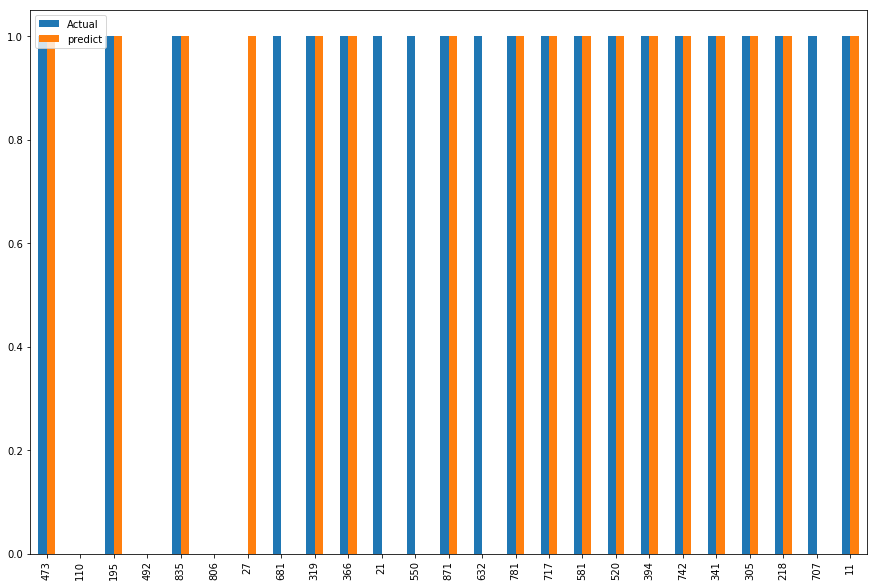

Mean absolute error 0.16216216216216217
Mean square error 0.16216216216216217
Root mean square error 0.4026936331284146


In [169]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
accuracy=accuracy_score(y_test,predict)
classification_report(y_test,predict)
accuracy
data=df1.head(25)
data.plot(kind='bar',figsize=(15,10))
plt.show()
#Calculate Error
#calculate the error
print("Mean absolute error",metrics.mean_absolute_error(y_test,predict))
print("Mean square error",metrics.mean_squared_error(y_test,predict))
print("Root mean square error",np.sqrt(metrics.mean_squared_error(y_test,predict)))
